The code below makes sure that it constantly checks if there were changes in made in the `inverse_optim` package.

In [1]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from inverse_optim import gen_data
from inverse_optim import research_plot
from inverse_optim import sancho
import tadasets
import tqdm
import powerbox as pbox
import gudhi as gd

# Experiment

## Periodic boundary conditions experiment

Experiment to fix boundary conditions. Currently failed.

100%|██████████| 300/300 [00:11<00:00, 27.05it/s]


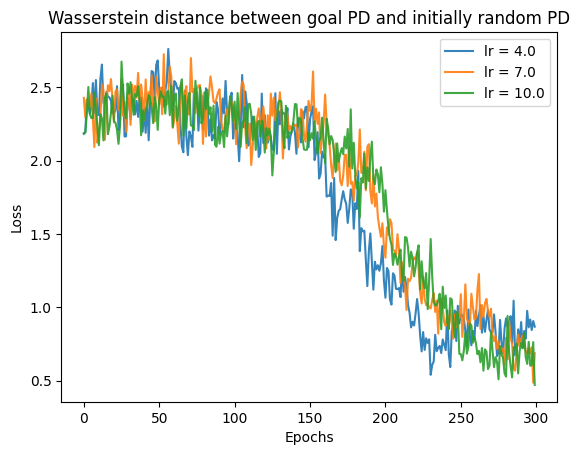

In [57]:
N=300
y = tadasets.dsphere(n=N, d=1, noise=0.1)

# Translate whole point set so that nothing is negative
x = np.min(y)
y = y - x

# Create periodic boundaries
z = np.max(y)


# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
y = torch.tensor(y)

# Plot the initial/goal data set
# P = y.detach().numpy()
# plt.scatter(P[:, 0], P[:, 1])
# plt.show()

# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(y)
epochs = 300
# Generation of new dataset
lr_list = np.linspace(4,10,3)
for lr in lr_list:
    _, loss_list, _, _, _ = \
        gen_data.per_generate_data(goal_pd=goal_pd, amount=N, dim=2, lr=1.5, epochs=epochs, per1=z, per2=x, decay_speed=50, investigate=True)
    
    # Loss research
    plt.plot(range(epochs), loss_list, label=f"lr = {lr}", alpha=0.9)

# Loss research
plt.title("Wasserstein distance between goal PD and initially random PD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()


# final_pts = gen_data.per_generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=10, epochs=epochs, per1=z, per2=x, decay_speed=30, investigate=False)



In [49]:
goal_pts = y
goal_pts = goal_pts.detach().numpy()
final_pts = final_pts.detach().numpy()

In [50]:
# The number of grid points are also required when passing the samples
p_k_samples, bins_samples = pbox.get_power(goal_pts, 2.0, N=N)
p_k_samples_new, bins_samples_new = pbox.get_power(final_pts, 8.0, N=N)

/Users/sliemela/Environments/inverse_optim_env/lib/python3.7/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")


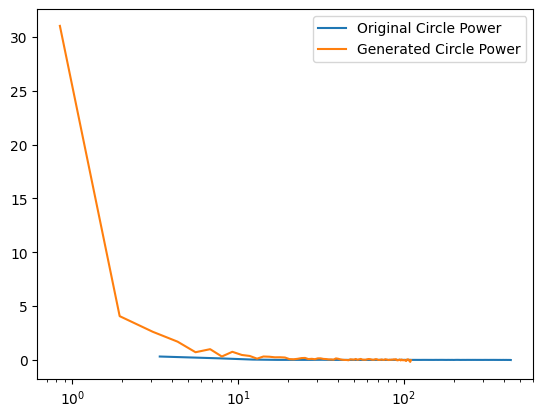

In [52]:
plt.plot(bins_samples, p_k_samples,label="Original Circle Power")
plt.plot(bins_samples_new, p_k_samples_new,label="Generated Circle Power")

plt.legend()
plt.xscale('log')
# plt.yscale('log')

 16%|█▌        | 94/600 [00:01<00:06, 82.42it/s]

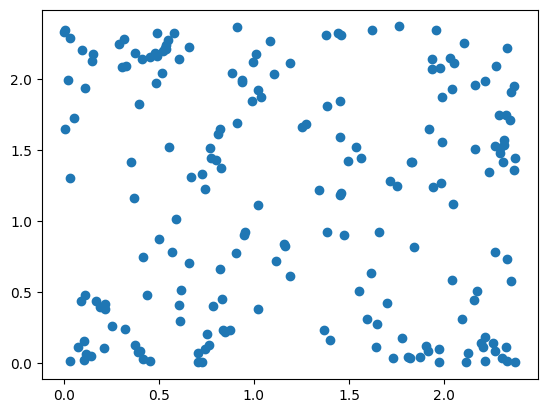

 32%|███▏      | 191/600 [00:02<00:04, 91.21it/s]

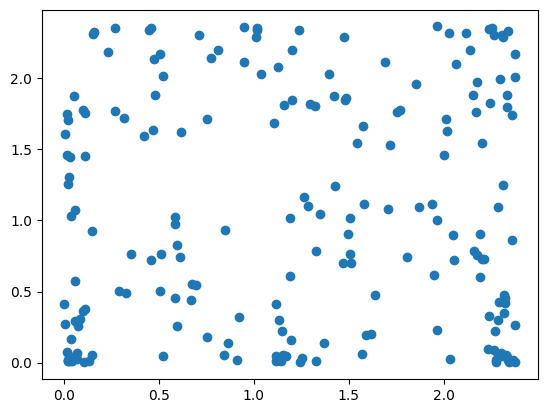

 49%|████▉     | 295/600 [00:03<00:03, 88.92it/s]

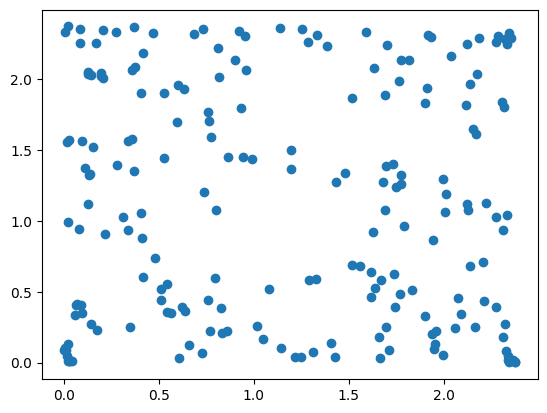

 66%|██████▌   | 397/600 [00:05<00:02, 88.11it/s]

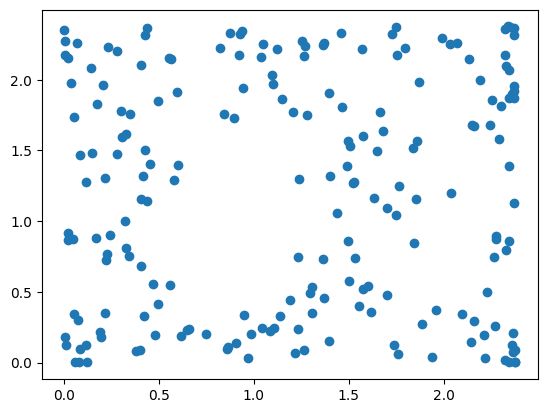

 82%|████████▏ | 490/600 [00:06<00:01, 91.31it/s]

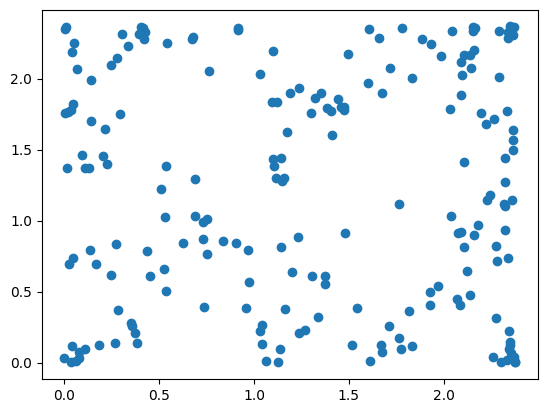

 98%|█████████▊| 590/600 [00:07<00:00, 96.23it/s]

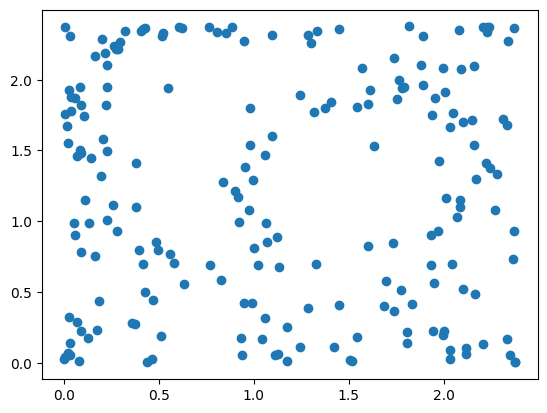

100%|██████████| 600/600 [00:07<00:00, 76.73it/s]


In [41]:
N=200
# y = tadasets.dsphere(n=N, d=1, noise=0.1)
y = tadasets.infty_sign(n=N, noise=0.1)

# Translate whole point set so that nothing is negative
x = np.min(y)
y = y - x

# Create periodic boundaries
z = np.max(y)


# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
y = torch.tensor(y)

# Plot the initial/goal data set
# P = y.detach().numpy()
# plt.scatter(P[:, 0], P[:, 1])
# plt.show()

# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(y)
epochs = 600
# # Generation of new dataset
# lr_list = np.linspace(4,20,3)
# for lr in lr_list:
#     _, loss_list, _, _, _ = \
#         gen_data.per_generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=1.5, epochs=epochs, per1=z, per2=x, decay_speed=10, investigate=True)
    
#     # Loss research
#     plt.plot(range(epochs), loss_list, label=f"lr = {lr}", alpha=0.9)

# # Loss research
# plt.title("Wasserstein distance between goal PD and initially random PD")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(loc="upper right")
# plt.show()


final_pts = gen_data.per_generate_data(goal_pd=goal_pd, amount=N, dim=2, lr=4, epochs=epochs, per1=z, per2=x, decay_speed=30, investigate=False)



In [31]:
numeric_solutions = [solution[x].evalf(5) for solution in solutions]
print(numeric_solutions)


NameError: name 'solutions' is not defined

In [37]:
x = torch.tensor([-1, 2, 3])
torch.fmod(x,3)

tensor([-1,  2,  0])

[([2], [2, 0]), ([6], [6, 1]), ([7], [7, 2]), ([9], [9, 4]), ([3], [3, 1]), ([8], [8, 3]), ([1], [6, 0]), ([5], [5, 4]), ([0], [7, 5]), ([5, 2], [7, 5, 2]), ([8, 5], [8, 5, 3]), ([9, 8], [9, 8, 5]), ([4], [])]
Start experiment
[2, 0]
[6, 1]
[7, 2]
[9, 4]
[3, 1]
[8, 3]
[6, 0]
[5, 4]
[7, 5]
[]


ValueError: expected sequence of length 2 at dim 1 (got 0)

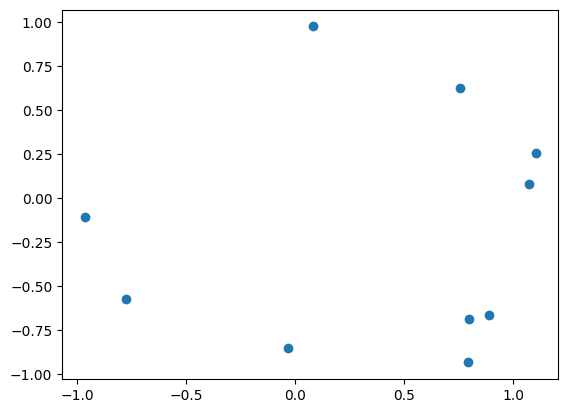

In [31]:
import gudhi as gd

N=10
goal_pts = tadasets.dsphere(n=N, d=1, noise=0.1) # circle

plt.scatter(goal_pts[:,0], goal_pts[:,1]) 

goal_pts = torch.tensor(goal_pts)
# Creation of simplex tree
alpha_complex = gd.AlphaComplex(points=goal_pts)
alpha_st = alpha_complex.create_simplex_tree()

# Calculating persistence
alpha_st.compute_persistence(2)
p = alpha_st.persistence_pairs()

print(p)

# Keep only pairs that contribute to H1, i.e. (edge, triangle), and separate birth (p1b) and death (p1d)
p1b = torch.tensor([i[0] for i in p if len(i[0]) == 1])
p1d = torch.tensor([i[1] for i in p if len(i[0]) == 1])
p1d = []

print("Start experiment")
for i in p:
    if len(i[0]) == 1:
        print(i[1])
        p1d.append(i[1])

p1d = torch.tensor(p1d)

print(p1b)
# print(p1d)
# print(p1b[:,1])
# print(p1d[:,0])
# print(goal_pts)
# print("Now only the ones specified")
# print(goal_pts[p1b[:,1]])
# b = torch.norm(goal_pts[p1b[:,1]] - goal_pts[p1b[:,0]], dim=-1, keepdim=True)
# print(b)

In [9]:
x = torch.tensor([([18], [18, 10]), ([11], [11, 9]), ([15], [15, 14]), ([13], [13, 5]), ([17], [17, 13])])
print(x)

x[:,1]

ValueError: expected sequence of length 1 at dim 2 (got 2)

In [52]:
x = torch.tensor([[3,4], [1,1]], dtype=float)
y = torch.tensor([[2,3], [8,8]])

print(x - y)
print(torch.norm(x, dim=1, keepdim=True))

tensor([[ 1.,  1.],
        [-7., -7.]], dtype=torch.float64)
tensor([[5.0000],
        [1.4142]], dtype=torch.float64)


In [35]:
torch.tensor([]).shape[0]

x = torch.tensor([[1,2], [3,5], [1,8], [1,3], [2,3], [1,5]])
print(x[:100])

tensor([[1, 2],
        [3, 5],
        [1, 8],
        [1, 3],
        [2, 3],
        [1, 5]])


In [53]:
x = np.array([[2,3], [3,4]])

for row_index, row in enumerate(x):
    print(f"Column {row_index} is given by {row}")


x = np.array([2,4,4,5,9])
x = np.delete(x, 0)
print(x)
x = np.delete(x, 0)
print(x)
x = np.delete(x, 0)
print(x)
x = np.delete(x, 0)
print(x)

Column 0 is given by [2 3]
Column 1 is given by [3 4]
[4 4 5 9]
[4 5 9]
[5 9]
[9]


In [29]:
a = torch.tensor([[1,2], [3,5], [1,8], [1,3], [2,3]])
b = torch.tensor([[1,2], [3,5], [1,8], [1,3], [2,3], [1,5]])

a = torch.stack(sorted(a, key=lambda a: a[1] - a[0]))
b = torch.stack(sorted(b, key=lambda b: b[1] - b[0]))

print(a)
print(b)

a = a.flatten()
b = b.flatten()



print(a)
print(b)
print(type(a.shape[0]))
print(b.shape[0])

x = min(a.shape[0], b.shape[0])
print(x)




tensor([[1, 2],
        [2, 3],
        [3, 5],
        [1, 3],
        [1, 8]])
tensor([[1, 2],
        [2, 3],
        [3, 5],
        [1, 3],
        [1, 5],
        [1, 8]])
tensor([1, 2, 2, 3, 3, 5, 1, 3, 1, 8])
tensor([1, 2, 2, 3, 3, 5, 1, 3, 1, 5, 1, 8])
<class 'int'>
12
10


## Flag persistence

In [18]:
amount = 100
pts = torch.tensor(tadasets.dsphere(n=amount, d=1, noise=0.1))

rips = gd.RipsComplex(points=pts, max_edge_length=0.5)
# .5 because it is faster and, experimentally, the cycles remain smaller
st = rips.create_simplex_tree(max_dimension=2)
st.compute_persistence()
i = st.flag_persistence_generators()



[array([[81, 40, 81,  4],
       [92,  4, 81, 46],
       [91, 39, 79, 23],
       [84, 35, 42, 35],
       [13, 11, 15, 13],
       [80, 62, 72, 62]])]


In [21]:
print(i[1][0])

print(i[1][0][:, (0, 2)])

[[81 40 81  4]
 [92  4 81 46]
 [91 39 79 23]
 [84 35 42 35]
 [13 11 15 13]
 [80 62 72 62]]
[[81 81]
 [92 81]
 [91 79]
 [84 42]
 [13 15]
 [80 72]]


In [27]:
i1 = torch.tensor(i[1][0])
print(pts[i1[:, (0,2)]])
print(pts[81])

tensor([[[ 0.8099,  0.7026],
         [ 0.8099,  0.7026]],

        [[ 0.9064,  0.6808],
         [ 0.8099,  0.7026]],

        [[-0.8477,  0.2717],
         [-0.9182,  0.2935]],

        [[-0.8105, -0.1217],
         [-0.9243, -0.2281]],

        [[ 0.7670, -0.3456],
         [ 1.0184, -0.4132]],

        [[-0.9613, -0.5592],
         [-0.7808, -0.5842]]], dtype=torch.float64)
tensor([0.8099, 0.7026], dtype=torch.float64)


## Alpha DTM Persistence

In [31]:
amount = 100
pts = torch.tensor(tadasets.dsphere(n=amount, d=1, noise=0.1))

test = gen_data.create_hybrid_dtm_pd(pts)

print(test)


Alpha Weighted Rips Complex is of dimension 2 - 559 simplices - 100 vertices. Filtration maximal value is inf.


# Sancho

In [ ]:
# Load dataset
cat = np.load(f'/Users/sliemela/Downloads/Sancho/fiducial_HOD_fid_NFW_sample0_1Gpc_z0.50_RSD3_run0.npz')
pos = cat['pos']        # shape: (N_galaxies, 3) --> X,Y,Z position of each galaxy in Mpc/h
vel = cat['vel']        # shape: (N_galaxies, 3) --> Vx, Vy, Vz velocity of the galaxy in km/s
gtype = cat['gtype']

# Split up the dataset
split = (2,2,2)
bins = sancho.bin(pos, split)

# Plotting the bins
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for x in bins:
    if len(x) != 0:
        ax.scatter3D(x[:, 0], x[:, 1], x[:, 2])

In [ ]:
# Calculating the statistics of the wasserstein distances of sancho
list_of_wasser_dist = sancho.compare_wasser_alpha(bins)

wasser_mean = np.mean(list_of_wasser_dist)
wasser_std = np.std(list_of_wasser_dist)

print(wasser_mean)
print(wasser_std)

# NOTE: the code of compare_wasser_alpha has been changed to only consider the first 3000. In the future, we may consider all pairs. 